<a href="https://colab.research.google.com/github/het-khatusuriya/ML/blob/main/MLPraexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ML Practical Task

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np

In [27]:
#Sequential model
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dropout(0.2))

classifier.add(Dense(units=256, activation='relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(units=128, activation='relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(units=3, activation='softmax'))

In [28]:
classifier.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
#split training and testing set
train_generator = train_datagen.flow_from_directory(
    '/content/sample_data/Training', target_size=(32, 32), batch_size=25, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    '/content/sample_data/test', target_size=(32, 32), batch_size=25, class_mode='categorical' )

Found 520 images belonging to 3 classes.
Found 503 images belonging to 3 classes.


In [30]:

score_fit = classifier.fit_generator(train_generator, steps_per_epoch=15,
                                     epochs=25, validation_data=test_generator, validation_steps=15)


score = classifier.evaluate_generator(test_generator, steps=len(test_generator))

print("Evaluation:")
print("Loss:", score[0])
print("Accuracy:", score[1])

<ipython-input-30-9d7cfbfd8b33>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  score_fit = classifier.fit_generator(train_generator, steps_per_epoch=15,


Epoch 1/25
15/15 [==============================] - 5s 197ms/step - loss: 1.0897 - accuracy: 0.5135 - val_loss: 0.5975 - val_accuracy: 0.6373
Epoch 2/25
15/15 [==============================] - 2s 141ms/step - loss: 0.6011 - accuracy: 0.6747 - val_loss: 0.4549 - val_accuracy: 0.8693
Epoch 3/25
15/15 [==============================] - 3s 193ms/step - loss: 0.4642 - accuracy: 0.8162 - val_loss: 0.2500 - val_accuracy: 0.9280
Epoch 4/25
15/15 [==============================] - 3s 208ms/step - loss: 0.3251 - accuracy: 0.8800 - val_loss: 0.4293 - val_accuracy: 0.8000
Epoch 5/25
15/15 [==============================] - 2s 149ms/step - loss: 0.2328 - accuracy: 0.9200 - val_loss: 0.1218 - val_accuracy: 0.9440
Epoch 6/25
15/15 [==============================] - 2s 146ms/step - loss: 0.1740 - accuracy: 0.9440 - val_loss: 0.2793 - val_accuracy: 0.8800
Epoch 7/25
15/15 [==============================] - 3s 186ms/step - loss: 0.1424 - accuracy: 0.9627 - val_loss: 0.2047 - val_accuracy: 0.9360
Epoch 

<ipython-input-30-9d7cfbfd8b33>:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = classifier.evaluate_generator(test_generator, steps=len(test_generator))


Evaluation:
Loss: 0.0785277709364891
Accuracy: 0.974155068397522


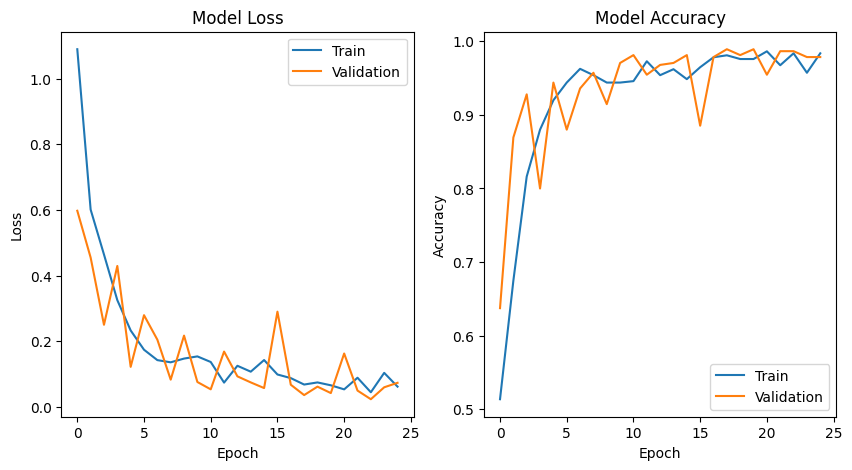

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(score_fit.history['loss'])
plt.plot(score_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(score_fit.history['accuracy'])
plt.plot(score_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()
